<a href="https://colab.research.google.com/github/andssuu/redes_neurais_pos/blob/main/Perceptron/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
!git clone https://github.com/andssuu/redes_neurais_pos

fatal: destination path 'redes_neurais_pos' already exists and is not an empty directory.


# **Código da Rede Neural Perceptron**

Abaixo é apresentado um código do perceptron. Prestem atenção nas equações e etapas de treinamento.


##Somatório:



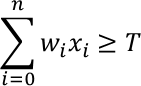


##Atualização dos Pesos:

Δ𝑤_𝑖=𝜂(𝑡−𝑜)𝑥_𝑖

𝑤_(𝑖+1)=𝑤_𝑖+Δ𝑤_𝑖

## Parâmetros: 
𝑛 = Número de exemplos

𝑥_𝑖= Vetor de características do exemplo 𝑖

𝑤_𝑖= Peso da conexão 𝑖

𝑇 = Limiar

In [96]:
import numpy as np

class Perceptron(object):

    def __init__(self, no_of_inputs, threshold=0.2, nIterations=100, learning_rate=0.01):
        self.nIterations = nIterations
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs)

    def predict(self, inputs):
        #.dot = produto de dois arrays (somatório entre entrada e peso)
        summation = np.dot(inputs, self.weights)
        if summation >= self.threshold:
          activation = 1
        else:
          activation = 0
        return activation

    def train(self, training_inputs, labels):
        for _ in range(self.nIterations):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                #delta = w_i + n*(t-o)*x
                delta = self.learning_rate * (label - prediction) * inputs
                #w_(i+1) = w_i + delta 
                self.weights += delta


#Exemplo dado em Sala de Aula:

##Operador AND



In [97]:
training_inputs = []
training_inputs.append(np.array([1, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([0, 0]))

labels = np.array([1, 0, 0, 0])

perceptron = Perceptron(2)
perceptron.train(training_inputs, labels)

inputs = np.array([1, 1])
p = perceptron.predict(inputs) 
print(p)
#=> 1

inputs = np.array([0, 1])
p = perceptron.predict(inputs) 
print(p)
#=> 0

1
0




---


#Exercícios:

1. Altere o código abaixo e rode para apenas uma execução. Qual o resultado para [1,1] e [0,1]?



[1, 1] ->  0
[0, 1] ->  0

Obs: Com apenas uma iteração o perceptron não conseguirá 
convergir os pesos para uma boa solução.

Abaixo uma representação da reta de classificação gerada
pelo perceptron, com apenas uma iteração, dentro do espaço
de características 



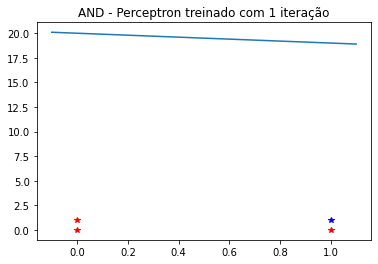

In [104]:
training_inputs = []
training_inputs.append(np.array([1, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([0, 0]))

labels = np.array([1, 0, 0, 0])

perceptron = Perceptron(2, nIterations=1)
perceptron.train(training_inputs, labels)

inputs = np.array([1, 1])
p = perceptron.predict(inputs) 
print("[1, 1] -> ", p)

inputs = np.array([0, 1])
p = perceptron.predict(inputs) 
print("[0, 1] -> ", p)

print('''
Obs: Com apenas uma iteração o perceptron não conseguirá 
convergir os pesos para uma boa solução.

Abaixo uma representação da reta de classificação gerada
pelo perceptron, com apenas uma iteração, dentro do espaço
de características 
''')

import matplotlib.pyplot as plt

[plt.plot(p[0], p[1], '*r') for p in training_inputs[1:]]
plt.plot(training_inputs[0][0], training_inputs[0][1], '*b')
plt.title('AND - Perceptron treinado com 1 iteração')
x_1 = np.arange(-0.1, 1.1, 0.05)
x_2 = (perceptron.threshold -
    (perceptron.weights[0] * x_1)) / perceptron.weights[1]
plt.plot(x_1, x_2)
plt.show()


2. Altere o código abaixo para o operador XOR. Deixe os parâmetros no padrão. Qual o resultado para [1,1] e [0,1]? 

3. Porque o resultado deu errado na questão anterior?

In [105]:
training_inputs = []
training_inputs.append(np.array([1, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([0, 0]))

# XOR
labels = np.array([0, 1, 1, 0])

perceptron = Perceptron(2)
perceptron.train(training_inputs, labels)

inputs = np.array([1, 1])
p = perceptron.predict(inputs) 
print("[1, 1] -> ", p)

inputs = np.array([0, 1])
p = perceptron.predict(inputs) 
print("[0, 1] -> ", p)


[1, 1] ->  1
[0, 1] ->  0


---
**Resposta questão 3**

O problema em questão (operador XOR) é uma instância de um problema não linearmente separável. O resultado deu errado, pois o classificador perceptron não consegue resolver esse tipo de problema, ou seja, o perceptron apenas resolve problemas linearmente separáveis. Abaixo são ilustrados os espaços de características onde fica claro esse limite do classificador.

---



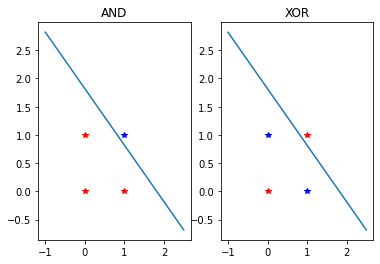

In [106]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2)
axs[0].plot([1, 0, 0], [0, 1, 0], '*r')
axs[0].plot(1, 1, '*b')
axs[0].set_title('AND')
x_1 = np.arange(-1, 3, 0.5)
x_2 = (perceptron.threshold -
    (perceptron.weights[0] * x_1)) / perceptron.weights[1]
axs[0].plot(x_1, x_2)
axs[1].plot([1, 0], [1, 0], '*r')
axs[1].plot([1, 0], [0, 1], '*b')
axs[1].set_title('XOR')
x_1 = np.arange(-1, 3, 0.5)
x_2 = (perceptron.threshold -
    (perceptron.weights[0] * x_1)) / perceptron.weights[1]
axs[1].plot(x_1, x_2)
plt.show()


4. Atualize a função de ativação do perceptron para a função sigmóide. 

OBS: Essa atualização fará o Percetron se transformar na Rede Neural Adaline, que utiliza uma função de ativação contínua ao invés de uma função limiar binária.

In [107]:
import numpy as np
import math

class Perceptron_to_Adaline(object):

    def __init__(self, no_of_inputs, threshold=0.2, nIterations=100, learning_rate=0.01):
        self.nIterations = nIterations
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs)
           
    def predict(self, inputs):
        #.dot = produto de dois arrays (somatório entre entrada e peso)
        summation = np.dot(inputs, self.weights)
        summation = 1 / (1 + math.exp(-summation))
        if summation >= self.threshold:
          activation = 1
        else:
          activation = 0            
        return activation

    def train(self, training_inputs, labels):
        for n_amostra in range(self.nIterations):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                #delta = w_i + n*(t-o)*x
                delta = self.learning_rate * (label**n_amostra - prediction) * inputs
                #w_(i+1) = w_i + delta 
                self.weights += delta


5. Agora, altere o código para que execute a base de dados Diabetes como Entrada. Avalie os hiperparâmetros abaixo nas redes Perceptron e Adaline, e diga a taxa de acerto no conjunto de testes pra cada configuração.

    a) Taxa de Aprendizado = 0.01 e Limiar= 0.2

    b) Taxa de Aprendizado = 0.1 e Limiar= 0.2

    c) Taxa de Aprendizado = 0.01 e Limiar= 0.5

    d) Taxa de Aprendizado = 0.1 e Limiar= 0.5

In [110]:
# Neste código vou utilizar o pandas, framework amplamente utilizado pra lidar com dados
import pandas as pd
from sklearn.model_selection import train_test_split


#carrega a base de dados e retorna conjuntos de treinamento e teste
def load_data():
    url = 'redes_neurais_pos/Perceptron/diabetes.csv'
    df = pd.read_csv(url)
    #remove a ultima coluna (dados)
    data = df[df.columns[:-1]]
    #normaliza os dados
    normalized_data = (data - data.min()) / (data.max() - data.min())
    #retorna a última coluna (rótulos)
    labels = df[df.columns[-1]]
    #separa em conjunto de treinamento e teste com seus respectivos rótulos
    X_train, X_test, y_train, y_test = train_test_split(normalized_data, labels, test_size=0.2, random_state=0) 
    return X_train, X_test, y_train, y_test

# chama função que carrega base de dados
training_inputs, test_inputs, training_labels, test_labels = load_data()
rates = [0.01, 0.1, 0.01, 0.1]
thresholds = [0.2, 0.2, 0.5, 0.5]
for rate, threshold in zip(rates, thresholds):
    # perceptron train
    perceptron = Perceptron(8, learning_rate=rate, threshold=threshold)
    perceptron.train(training_inputs.values, training_labels.values)
    # adaline train
    adaline = Perceptron_to_Adaline(8, learning_rate=rate, threshold=threshold)
    adaline.train(training_inputs.values, training_labels.values)
    # perceptron predict
    p_perceptron = [perceptron.predict(x) for x in test_inputs.values]
    # perceptron predict
    p_adaline = [adaline.predict(x) for x in test_inputs.values]
    print("\nTaxa de Aprendizado = {} e Limiar= {}".format(rate, threshold))
    print("\tTaxa de acerto Perceptron -> ", sum([1 for _p, _l in zip(p_perceptron, test_labels.values) if _p==_l])/len(test_labels.values))
    print("\tTaxa de acerto Adaline -> ", sum([1 for _p, _l in zip(p_adaline, test_labels.values) if _p==_l])/len(test_labels.values))



Taxa de Aprendizado = 0.01 e Limiar= 0.2
	Taxa de acerto Perceptron ->  0.7467532467532467
	Taxa de acerto Adaline ->  0.43506493506493504

Taxa de Aprendizado = 0.1 e Limiar= 0.2
	Taxa de acerto Perceptron ->  0.7272727272727273
	Taxa de acerto Adaline ->  0.44805194805194803

Taxa de Aprendizado = 0.01 e Limiar= 0.5
	Taxa de acerto Perceptron ->  0.7662337662337663
	Taxa de acerto Adaline ->  0.7207792207792207

Taxa de Aprendizado = 0.1 e Limiar= 0.5
	Taxa de acerto Perceptron ->  0.7467532467532467
	Taxa de acerto Adaline ->  0.7207792207792207
